### Smart Drone Network (SDN)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

-----------

In [3]:
def random_ID(N):
        letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
        numbers = [str(i) for i in range(10)]
        ID = ""
        for k in range(N):
            t = random.choice([0,1])
            if t == 0: ID = ID + random.choice(letters)
            else: ID = ID + random.choice(numbers)
        
        return ID

### This is Pokhara!

In [4]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

#### Random Position

In [5]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [6]:
len(LAT), len(LONG)

(900, 900)

### Generate A random Network

In [7]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 200\nNumber of edges: 802\nAverage degree:   8.0200'

In [9]:
pos = nx.get_node_attributes(G, 'pos')

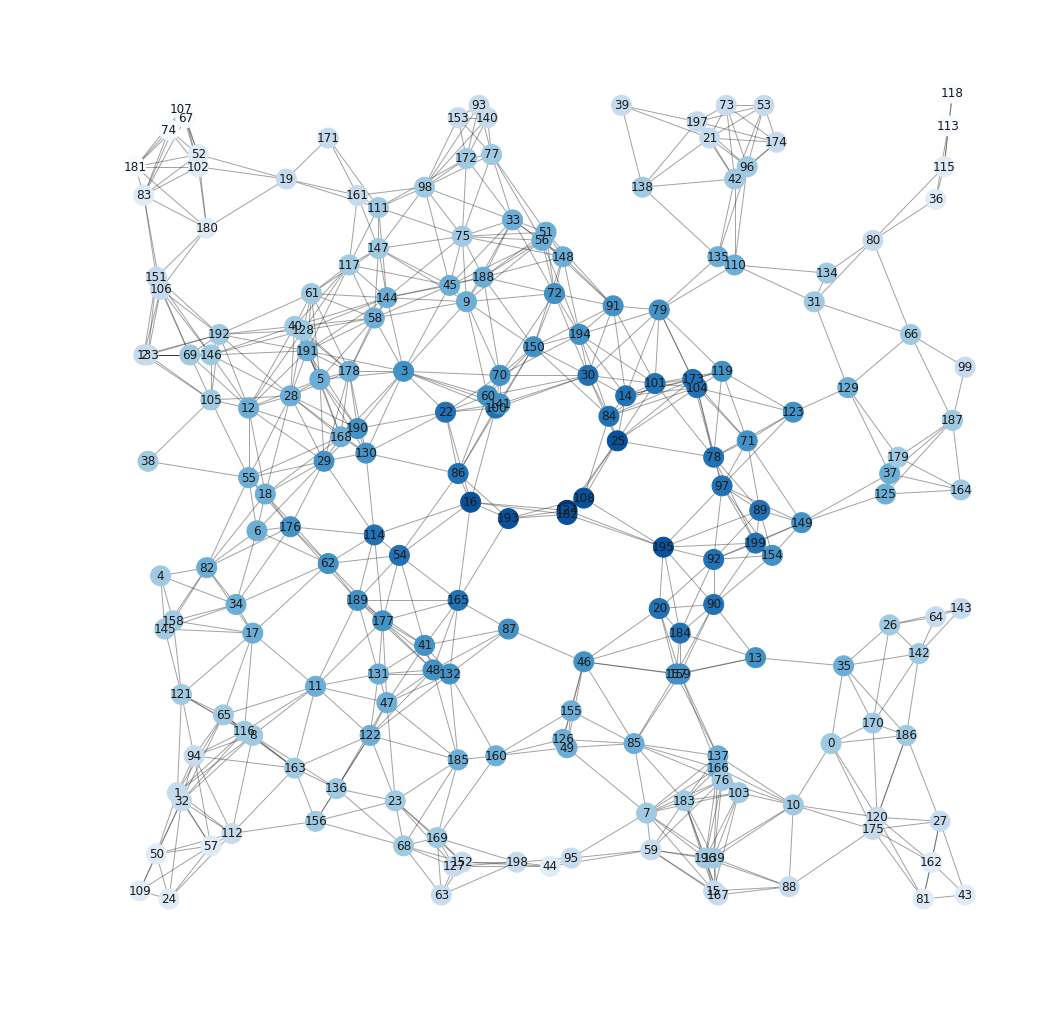

In [10]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Prepare geolocation coordinates

In [11]:
LINE = []
for e in list(G.edges()):
    f = e[0]
    t = e[1]
    LINE.append({"lat":[pos[f][0],pos[t][0]],"long":[pos[f][1],pos[t][1]]})

In [12]:
LAT_node = []
LONG_node = []
for n in list(G.nodes()):
    LAT_node.append(pos[n][0])
    LONG_node.append(pos[n][1])

### Geo Location

In [13]:
# import gmplot package 
import gmplot 
  
gmap3 = gmplot.GoogleMapPlotter(xc,yc, 15) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( LAT_node,LONG_node,'red', size = 100, marker = False ) 
        
# Plot method Draw a line in 
# between given coordinates 

for item in LINE:
    gmap3.plot(item['lat'],item['long'],  
           'cornflowerblue', edge_width = 1.5) 
  

gmap3.draw( "pokhara-lattice.html" ) 

![img](img/pokhara.png)

In [16]:
k = 0
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])
    k = k+1
    if k>5:
        break

0 | [175, 170, 186, 120, 35, 10]
1 | [116, 65, 8, 121, 32, 57, 50, 94, 112]
2 | [146, 192, 69, 133, 151, 105, 106]
3 | [141, 190, 22, 60, 178, 70, 144, 191, 5, 100, 45, 130, 168, 9, 58]
4 | [34, 82, 158, 145]
5 | [178, 29, 190, 58, 3, 130, 61, 28, 191, 40, 128, 12, 168]


### Minimal Spanning Tree

In [11]:
T=nx.minimum_spanning_tree(G)

In [13]:
print(sorted(T.edges(data=True)))

[(0, 10, {}), (0, 35, {}), (0, 120, {}), (0, 170, {}), (0, 175, {}), (0, 186, {}), (1, 8, {}), (1, 32, {}), (1, 50, {}), (1, 57, {}), (1, 65, {}), (1, 94, {}), (1, 112, {}), (1, 116, {}), (1, 121, {}), (2, 69, {}), (2, 105, {}), (2, 106, {}), (2, 133, {}), (2, 146, {}), (2, 151, {}), (2, 192, {}), (3, 5, {}), (3, 9, {}), (3, 22, {}), (3, 45, {}), (3, 58, {}), (3, 60, {}), (3, 70, {}), (3, 100, {}), (3, 130, {}), (3, 141, {}), (3, 144, {}), (3, 168, {}), (3, 178, {}), (3, 190, {}), (3, 191, {}), (4, 34, {}), (4, 82, {}), (4, 145, {}), (4, 158, {}), (5, 12, {}), (5, 28, {}), (5, 29, {}), (5, 40, {}), (5, 61, {}), (5, 128, {}), (6, 18, {}), (6, 29, {}), (6, 55, {}), (6, 62, {}), (6, 82, {}), (6, 176, {}), (7, 15, {}), (7, 49, {}), (7, 59, {}), (7, 76, {}), (7, 85, {}), (7, 95, {}), (7, 103, {}), (7, 137, {}), (7, 139, {}), (7, 166, {}), (7, 183, {}), (7, 196, {}), (8, 11, {}), (8, 136, {}), (8, 163, {}), (9, 33, {}), (9, 56, {}), (9, 72, {}), (9, 75, {}), (9, 147, {}), (9, 150, {}), (9, 1

(28.08974818797291, 28.329451812027333, 83.86550807374701, 84.10469192625395)

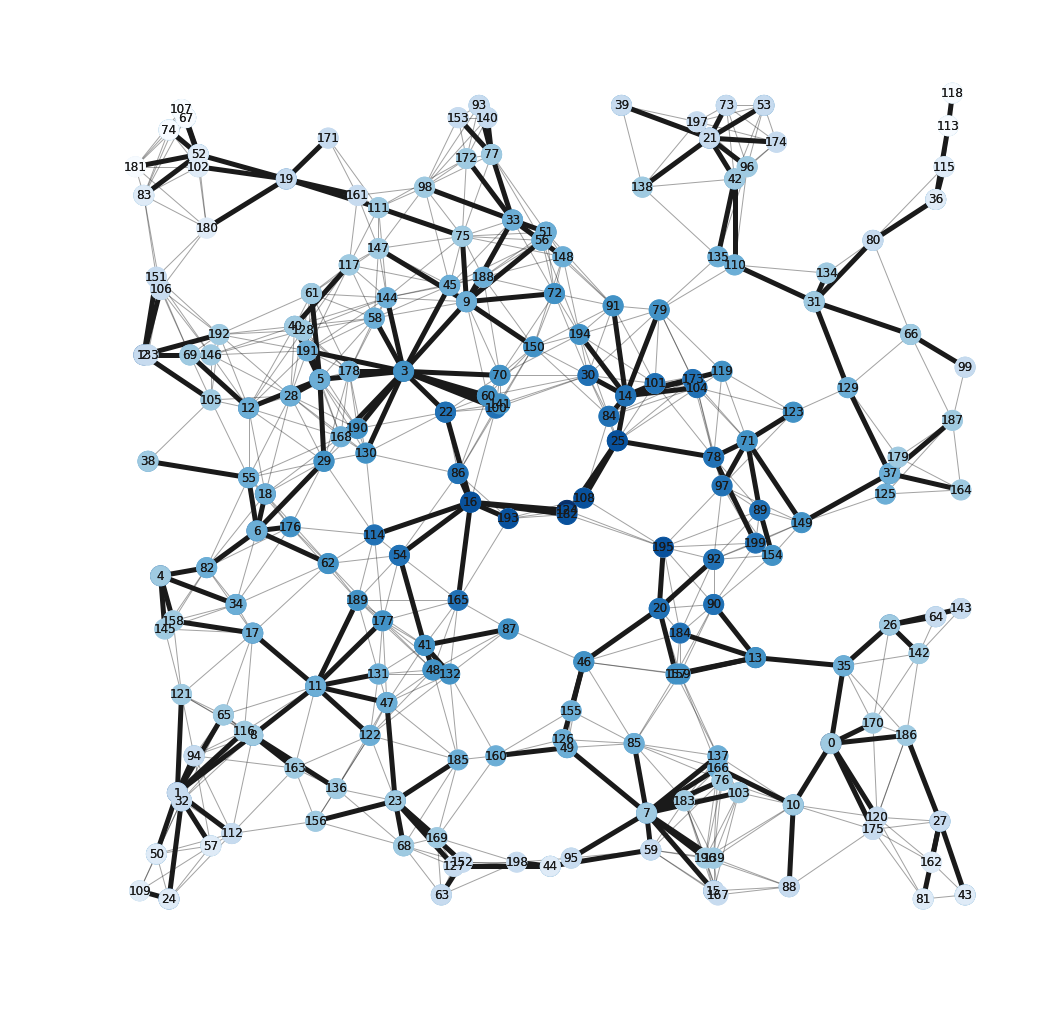

In [23]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(T, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(T, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(T,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Defth First Search

In [24]:
DFS = nx.dfs_tree(G,0)

In [25]:
print(sorted(DFS.edges(data=True)))

[(0, 175, {}), (1, 8, {}), (2, 133, {}), (3, 141, {}), (4, 34, {}), (5, 190, {}), (6, 176, {}), (7, 49, {}), (8, 94, {}), (9, 70, {}), (10, 166, {}), (11, 65, {}), (13, 35, {}), (13, 90, {}), (14, 84, {}), (15, 103, {}), (16, 86, {}), (17, 116, {}), (17, 158, {}), (18, 6, {}), (19, 171, {}), (20, 92, {}), (21, 96, {}), (21, 138, {}), (22, 16, {}), (23, 47, {}), (25, 104, {}), (26, 142, {}), (27, 43, {}), (28, 178, {}), (29, 114, {}), (30, 79, {}), (31, 80, {}), (32, 109, {}), (33, 148, {}), (34, 82, {}), (35, 26, {}), (36, 113, {}), (37, 164, {}), (40, 192, {}), (41, 54, {}), (42, 174, {}), (43, 162, {}), (44, 152, {}), (45, 33, {}), (46, 20, {}), (47, 122, {}), (48, 165, {}), (48, 185, {}), (49, 126, {}), (50, 24, {}), (51, 188, {}), (52, 19, {}), (52, 107, {}), (53, 21, {}), (54, 177, {}), (55, 168, {}), (56, 75, {}), (57, 112, {}), (59, 196, {}), (60, 3, {}), (61, 147, {}), (62, 18, {}), (65, 121, {}), (66, 99, {}), (67, 181, {}), (68, 127, {}), (69, 106, {}), (70, 60, {}), (71, 78,

(28.08980999999997, 28.329390000000267, 83.86591499999992, 84.10428500000106)

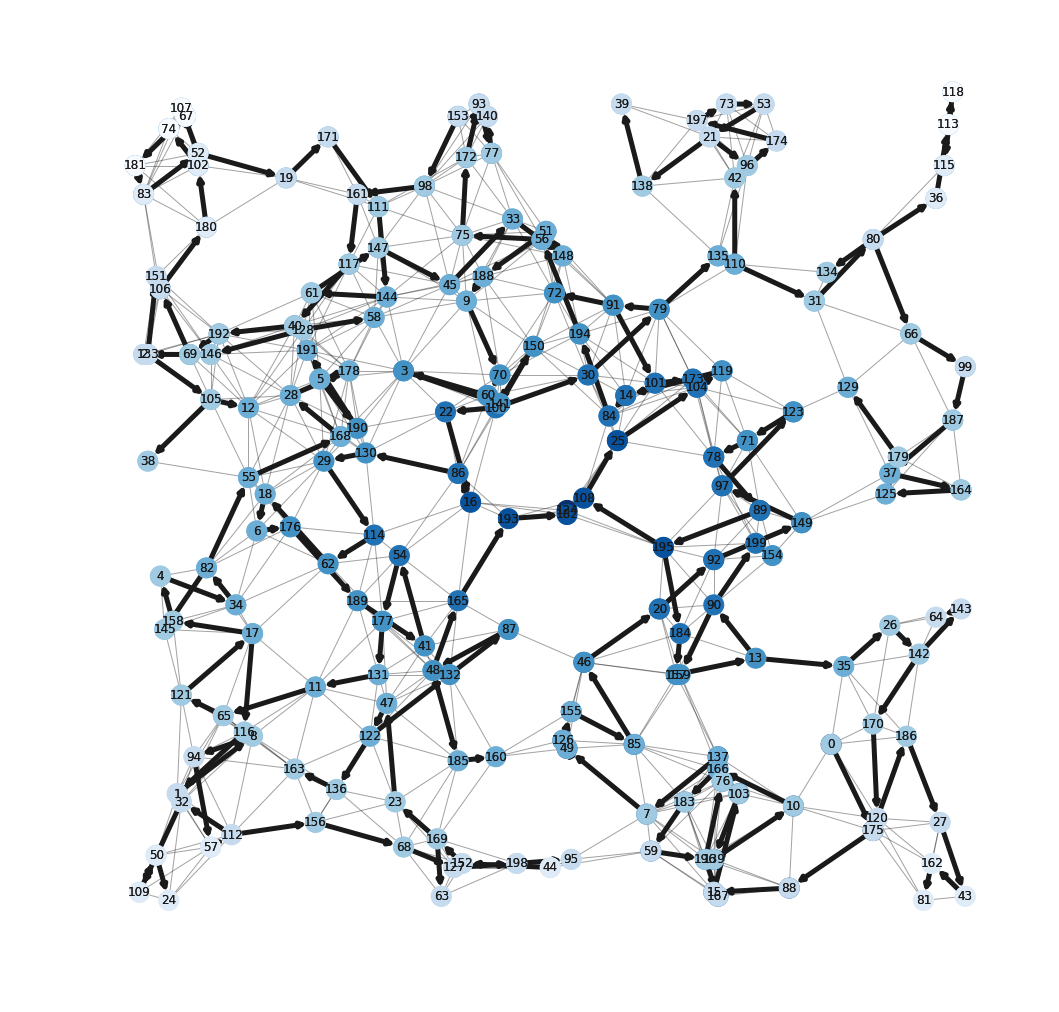

In [26]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(DFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(DFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(DFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Breadth First Searh

In [28]:
BFS = nx.bfs_tree(G,0)

(28.08980999999997, 28.329390000000267, 83.86591499999992, 84.10428500000106)

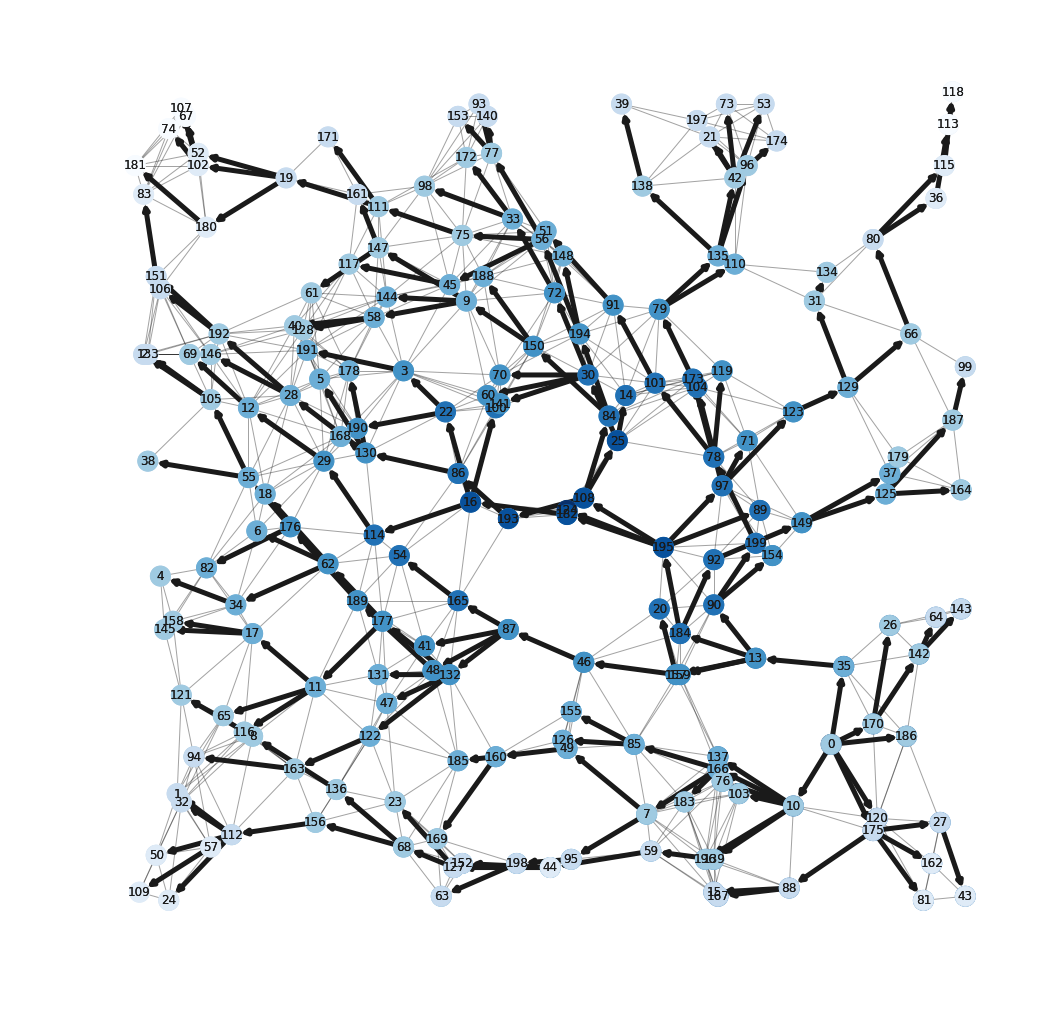

In [29]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(BFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(BFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(BFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')